In [187]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import categorical as cat
sns.set(style="darkgrid")


In [188]:
train=pd.read_csv("train.csv",encoding='iso-8859-1',names=['VehicleID',
'DataCollectedDate',
'NameOfTheVehicle',
'SellerType',
'OfferType',
'Price',
'VehicleType',
'YearOfVehicleRegistration',
'GearBoxType',
'PowerOfTheEngine',
'ModelOfTheVehicle',
'DistranceTravelled',
'MonthOfVehicleRegistration',
'TypeOfTheFuelUsed',
'BrandOfTheVehicle',
'IsDamageRepaired',
'DateOfAdCreation',
'NumberOfPictures',
'ZipCode',
'DateOfAdLastSeen'],skiprows=1,infer_datetime_format=True)
test=pd.read_csv("test.csv",encoding='iso-8859-1',names=['VehicleID',
'DataCollectedDate',
'NameOfTheVehicle',
'SellerType',
'OfferType',
'VehicleType',
'YearOfVehicleRegistration',
'GearBoxType',
'PowerOfTheEngine',
'ModelOfTheVehicle',
'DistranceTravelled',
'MonthOfVehicleRegistration',
'TypeOfTheFuelUsed',
'BrandOfTheVehicle',
'IsDamageRepaired',
'DateOfAdCreation',
'NumberOfPictures',
'ZipCode',
'DateOfAdLastSeen'],skiprows=1,infer_datetime_format=True)

In [189]:
train['Source']='train'
test['Source']='test'

In [190]:
df=pd.concat([train,test],axis=0,ignore_index=True,sort=True)

for x,y in zip(df['NameOfTheVehicle'],df['BrandOfTheVehicle']):
    print(y,x[len(y)+1:])

In [191]:
df.isna().sum()

BrandOfTheVehicle                 0
DataCollectedDate                 0
DateOfAdCreation                  0
DateOfAdLastSeen                  0
DistranceTravelled                0
GearBoxType                    2224
IsDamageRepaired               9098
ModelOfTheVehicle                 0
MonthOfVehicleRegistration        0
NameOfTheVehicle                  0
NumberOfPictures                  0
OfferType                         0
PowerOfTheEngine                  0
Price                         19609
SellerType                        0
Source                            0
TypeOfTheFuelUsed              2839
VehicleID                         0
VehicleType                    2480
YearOfVehicleRegistration         0
ZipCode                           0
dtype: int64

In [192]:
df['GearBoxType'].value_counts()

manual       56674
automatic    19568
Name: GearBoxType, dtype: int64

print(zip(df['NameOfTheVehicle'],df['GearBoxType']))

In [193]:
dfgear=df[df['GearBoxType'].notna()].groupby(['BrandOfTheVehicle','ModelOfTheVehicle','GearBoxType']).size().to_frame('size').reset_index()

In [194]:
dfgear.head()

,BrandOfTheVehicle,ModelOfTheVehicle,GearBoxType,size
0,alfa_romeo,145,manual,2
1,alfa_romeo,147,automatic,6
2,alfa_romeo,147,manual,132
3,alfa_romeo,156,automatic,9
4,alfa_romeo,156,manual,97


In [195]:
def applymode(x):
    a = x.mode()[0]
    #print(x,a)
    return x.fillna(a)

In [196]:
df.head()

,BrandOfTheVehicle,DataCollectedDate,DateOfAdCreation,DateOfAdLastSeen,DistranceTravelled,GearBoxType,IsDamageRepaired,ModelOfTheVehicle,MonthOfVehicleRegistration,NameOfTheVehicle,...,OfferType,PowerOfTheEngine,Price,SellerType,Source,TypeOfTheFuelUsed,VehicleID,VehicleType,YearOfVehicleRegistration,ZipCode
0,subaru,03/04/16 11:54,03/04/16 0:00,07/04/16 13:15,50000.0,manual,No,Other,7,Subaru_G3X_Justy_1.3,...,offer,94,3850.0,private,train,petrol,1,Small Car,2004,34474
1,volkswagen,08/03/16 19:54,08/03/16 0:00,11/03/16 17:15,150000.0,manual,No,passat,5,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,...,offer,140,5999.0,private,train,diesel,2,Combi,2007,50765
2,mercedes_benz,26/03/16 17:38,26/03/16 0:00,26/03/16 17:38,150000.0,automatic,No,c_klasse,2,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,...,offer,150,5990.0,private,train,diesel,3,limousine,2007,90475
3,alfa_romeo,11/03/16 13:42,11/03/16 0:00,12/03/16 2:45,150000.0,manual,No,147,9,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,...,offer,150,4000.0,private,train,diesel,4,limousine,2005,40699
4,audi,17/03/16 17:49,17/03/16 0:00,07/04/16 4:17,125000.0,manual,No,a4,3,Audi_A4,...,offer,200,12950.0,private,train,petrol,5,Combi,2005,84347


In [197]:
df['GearBoxType']=df.groupby(['BrandOfTheVehicle','ModelOfTheVehicle'])['GearBoxType'].transform(applymode)

In [198]:
df.isna().sum()

BrandOfTheVehicle                 0
DataCollectedDate                 0
DateOfAdCreation                  0
DateOfAdLastSeen                  0
DistranceTravelled                0
GearBoxType                       0
IsDamageRepaired               9098
ModelOfTheVehicle                 0
MonthOfVehicleRegistration        0
NameOfTheVehicle                  0
NumberOfPictures                  0
OfferType                         0
PowerOfTheEngine                  0
Price                         19609
SellerType                        0
Source                            0
TypeOfTheFuelUsed              2839
VehicleID                         0
VehicleType                    2480
YearOfVehicleRegistration         0
ZipCode                           0
dtype: int64

In [199]:
df['NameOfTheVehicle']=df['NameOfTheVehicle'].str.lower()

In [200]:
for index,x in zip(df[df['TypeOfTheFuelUsed'].isna()].index,df[df['TypeOfTheFuelUsed'].isna()]['NameOfTheVehicle']):
    if 'cdi' in x or 'tdi' in x:
        df.loc[index,'TypeOfTheFuelUsed']='diesel'
        #print(x)

In [201]:
for index,x in zip(df[df['TypeOfTheFuelUsed'].isna()].index,df[df['TypeOfTheFuelUsed'].isna()]['NameOfTheVehicle']):
    if 'lpg' in x:
        df.loc[index,'TypeOfTheFuelUsed']='lpg'
        #print(x)

In [202]:
for index,x in zip(df[df['TypeOfTheFuelUsed'].isna()].index,df[df['TypeOfTheFuelUsed'].isna()]['NameOfTheVehicle']):
    if 'ecofuel' in x:
        df.loc[index,'TypeOfTheFuelUsed']='cng'
        print(x)

touran_2.0_ecofuel_trendline


In [203]:
for index,x in zip(df[df['TypeOfTheFuelUsed'].isna()].index,df[df['TypeOfTheFuelUsed'].isna()]['NameOfTheVehicle']):
    if 'hybrid' in x:
        df.loc[index,'TypeOfTheFuelUsed']='hybrid'
        print(x)

mercedes_benz_s400_hybrid_2009_keyless_go_gerne_inzahlungnahme


In [204]:
for index,x in zip(df[df['TypeOfTheFuelUsed'].isna()].index,df[df['TypeOfTheFuelUsed'].isna()]['NameOfTheVehicle']):
    if ('electric' in x) or ('elektric' in x) or ('electro' in x):
        df.loc[index,'TypeOfTheFuelUsed']='electro'
        #print(x)

In [205]:
df.isna().sum()

BrandOfTheVehicle                 0
DataCollectedDate                 0
DateOfAdCreation                  0
DateOfAdLastSeen                  0
DistranceTravelled                0
GearBoxType                       0
IsDamageRepaired               9098
ModelOfTheVehicle                 0
MonthOfVehicleRegistration        0
NameOfTheVehicle                  0
NumberOfPictures                  0
OfferType                         0
PowerOfTheEngine                  0
Price                         19609
SellerType                        0
Source                            0
TypeOfTheFuelUsed              2468
VehicleID                         0
VehicleType                    2480
YearOfVehicleRegistration         0
ZipCode                           0
dtype: int64

In [206]:
df['TypeOfTheFuelUsed'].value_counts()

petrol     41447
diesel     33173
lpg         1093
cng          169
hybrid        77
electro       27
other         12
Name: TypeOfTheFuelUsed, dtype: int64

In [207]:
df[df['TypeOfTheFuelUsed'].isna()].head()

,BrandOfTheVehicle,DataCollectedDate,DateOfAdCreation,DateOfAdLastSeen,DistranceTravelled,GearBoxType,IsDamageRepaired,ModelOfTheVehicle,MonthOfVehicleRegistration,NameOfTheVehicle,...,OfferType,PowerOfTheEngine,Price,SellerType,Source,TypeOfTheFuelUsed,VehicleID,VehicleType,YearOfVehicleRegistration,ZipCode
63,volkswagen,30/03/16 23:52,30/03/16 0:00,31/03/16 6:41,40000.0,automatic,No,golf,0,vw_golf_vii_plus_1_jahr_neuwahlen_garantie,...,offer,140,25000.0,private,train,NaN,64,limousine,2013,10367
81,hyundai,24/03/16 22:56,24/03/16 0:00,28/03/16 4:15,150000.0,manual,NaN,Other,5,hyundai_atos_1.1_prime__tüv_bis_12/2017,...,offer,58,1450.0,private,train,NaN,82,Small Car,2005,38165
83,chrysler,04/04/16 22:45,04/04/16 0:00,07/04/16 1:17,150000.0,manual,NaN,ptcruiser,0,chrysler_pt_cruiser_cabrio,...,offer,134,3500.0,private,train,NaN,84,cabrio,2006,66687
90,bmw,26/03/16 16:54,26/03/16 0:00,29/03/16 19:44,150000.0,automatic,NaN,3er,0,330d_aut_._xenon_standheizung_leder,...,offer,231,9400.0,private,train,NaN,91,NaN,2007,21337
153,volkswagen,30/03/16 9:56,30/03/16 0:00,07/04/16 0:17,125000.0,manual,No,passat,2,volkswagen_passat,...,offer,0,9900.0,private,train,NaN,154,limousine,2005,4746


In [208]:
df['TypeOfTheFuelUsed']=df.groupby(['BrandOfTheVehicle'])['TypeOfTheFuelUsed'].transform(applymode)

In [209]:
df['VehicleType']=df.groupby(['BrandOfTheVehicle'])['VehicleType'].transform(applymode)

In [210]:
df.isna().sum()

BrandOfTheVehicle                 0
DataCollectedDate                 0
DateOfAdCreation                  0
DateOfAdLastSeen                  0
DistranceTravelled                0
GearBoxType                       0
IsDamageRepaired               9098
ModelOfTheVehicle                 0
MonthOfVehicleRegistration        0
NameOfTheVehicle                  0
NumberOfPictures                  0
OfferType                         0
PowerOfTheEngine                  0
Price                         19609
SellerType                        0
Source                            0
TypeOfTheFuelUsed                 0
VehicleID                         0
VehicleType                       0
YearOfVehicleRegistration         0
ZipCode                           0
dtype: int64

In [212]:
df['IsDamageRepaired'].value_counts()

No     64993
Yes     4375
Name: IsDamageRepaired, dtype: int64

In [213]:
df[df['IsDamageRepaired']=='Yes'].groupby(['IsDamageRepaired'])['YearOfVehicleRegistration'].max()

IsDamageRepaired
Yes    2016
Name: YearOfVehicleRegistration, dtype: int64

In [214]:
df[df['IsDamageRepaired']=='Yes'].groupby(['IsDamageRepaired'])['DistranceTravelled'].min()

IsDamageRepaired
Yes    5000.0
Name: DistranceTravelled, dtype: float64

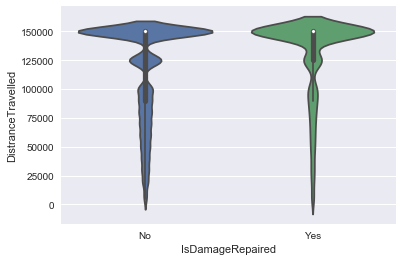

In [215]:
#df[df['IsDamageRepaired']=='Yes']['IsDamageRepaired'].plot()
cat.violinplot(x="IsDamageRepaired",y="DistranceTravelled", data=df);

In [216]:
df['IsDamageRepaired']=df['IsDamageRepaired'].fillna(value='No')

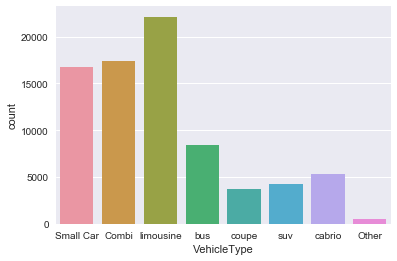

In [217]:
cat.countplot(x="VehicleType", data=df);

In [218]:
df.isna().sum()

BrandOfTheVehicle                 0
DataCollectedDate                 0
DateOfAdCreation                  0
DateOfAdLastSeen                  0
DistranceTravelled                0
GearBoxType                       0
IsDamageRepaired                  0
ModelOfTheVehicle                 0
MonthOfVehicleRegistration        0
NameOfTheVehicle                  0
NumberOfPictures                  0
OfferType                         0
PowerOfTheEngine                  0
Price                         19609
SellerType                        0
Source                            0
TypeOfTheFuelUsed                 0
VehicleID                         0
VehicleType                       0
YearOfVehicleRegistration         0
ZipCode                           0
dtype: int64

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78466 entries, 0 to 78465
Data columns (total 21 columns):
BrandOfTheVehicle             78466 non-null object
DataCollectedDate             78466 non-null object
DateOfAdCreation              78466 non-null object
DateOfAdLastSeen              78466 non-null object
DistranceTravelled            78466 non-null float64
GearBoxType                   78466 non-null object
IsDamageRepaired              78466 non-null object
ModelOfTheVehicle             78466 non-null object
MonthOfVehicleRegistration    78466 non-null int64
NameOfTheVehicle              78466 non-null object
NumberOfPictures              78466 non-null int64
OfferType                     78466 non-null object
PowerOfTheEngine              78466 non-null int64
Price                         58857 non-null float64
SellerType                    78466 non-null object
Source                        78466 non-null object
TypeOfTheFuelUsed             78466 non-null object
VehicleI

In [220]:
df['DataCollectedDate']=pd.to_datetime(df.DataCollectedDate)
df['DateOfAdCreation']=pd.to_datetime(df.DateOfAdCreation)
df['DateOfAdLastSeen']=pd.to_datetime(df.DateOfAdLastSeen)

In [221]:
df.head(10)

,BrandOfTheVehicle,DataCollectedDate,DateOfAdCreation,DateOfAdLastSeen,DistranceTravelled,GearBoxType,IsDamageRepaired,ModelOfTheVehicle,MonthOfVehicleRegistration,NameOfTheVehicle,...,OfferType,PowerOfTheEngine,Price,SellerType,Source,TypeOfTheFuelUsed,VehicleID,VehicleType,YearOfVehicleRegistration,ZipCode
0,subaru,2016-03-04 11:54:00,2016-03-04,2016-07-04 13:15:00,50000.0,manual,No,Other,7,subaru_g3x_justy_1.3,...,offer,94,3850.0,private,train,petrol,1,Small Car,2004,34474
1,volkswagen,2016-08-03 19:54:00,2016-08-03,2016-11-03 17:15:00,150000.0,manual,No,passat,5,volkswagen_passat_variant_2.0_tdi_dpf_comfortline,...,offer,140,5999.0,private,train,diesel,2,Combi,2007,50765
2,mercedes_benz,2016-03-26 17:38:00,2016-03-26,2016-03-26 17:38:00,150000.0,automatic,No,c_klasse,2,mercedes_benz_c_220_cdi_automatik_elegance_ahk...,...,offer,150,5990.0,private,train,diesel,3,limousine,2007,90475
3,alfa_romeo,2016-11-03 13:42:00,2016-11-03,2016-12-03 02:45:00,150000.0,manual,No,147,9,alfa_romeo_147_1.9_jtd_16v_m_jet,...,offer,150,4000.0,private,train,diesel,4,limousine,2005,40699
4,audi,2016-03-17 17:49:00,2016-03-17,2016-07-04 04:17:00,125000.0,manual,No,a4,3,audi_a4,...,offer,200,12950.0,private,train,petrol,5,Combi,2005,84347
5,mercedes_benz,2016-02-04 17:42:00,2016-02-04,2016-06-04 16:46:00,150000.0,automatic,No,c_klasse,5,mercedes_c_kalse,...,offer,129,3600.0,private,train,petrol,6,limousine,2000,45884
6,volkswagen,2016-03-15 13:53:00,2016-03-15,2016-03-19 07:16:00,150000.0,manual,No,passat,7,passat_3bg_variant_1_9tdi__6_gang,...,offer,131,4450.0,private,train,diesel,7,Combi,2003,58849
7,mazda,2016-11-03 10:51:00,2016-11-03,2016-05-04 21:17:00,80000.0,manual,No,5_reihe,8,gepflegtes_familienauto,...,offer,146,10500.0,private,train,petrol,8,bus,2010,6116
8,bmw,2016-03-25 00:56:00,2016-03-24,2016-03-28 06:44:00,150000.0,automatic,No,6er,12,bmw_645_ci_m_paket_leder_navi_xenon_sportauspuff,...,offer,333,10900.0,private,train,petrol,9,coupe,2004,10627
9,audi,2016-03-29 09:36:00,2016-03-29,2016-05-04 17:25:00,30000.0,manual,No,a3,10,audi_a3_1.4_tfsi,...,offer,122,17250.0,private,train,petrol,10,limousine,2013,10405


In [222]:
df['DaydiffAd']=(df['DateOfAdLastSeen']-df['DateOfAdCreation'])// np.timedelta64(1, 'D')
df['Yeardiff']=2018-df['YearOfVehicleRegistration']

In [223]:
df.loc[df['DaydiffAd']<0,'DaydiffAd']=0

In [224]:
df['DistranceTravelled'].value_counts()

150000.0    44142
125000.0     9549
100000.0     4051
90000.0      3374
80000.0      3196
70000.0      2911
60000.0      2634
50000.0      2324
40000.0      1920
30000.0      1780
20000.0      1482
5000.0        646
10000.0       457
Name: DistranceTravelled, dtype: int64

In [225]:
df['DistranceTravelledmod']=df['DistranceTravelled']/10000

In [226]:
df.head()

,BrandOfTheVehicle,DataCollectedDate,DateOfAdCreation,DateOfAdLastSeen,DistranceTravelled,GearBoxType,IsDamageRepaired,ModelOfTheVehicle,MonthOfVehicleRegistration,NameOfTheVehicle,...,SellerType,Source,TypeOfTheFuelUsed,VehicleID,VehicleType,YearOfVehicleRegistration,ZipCode,DaydiffAd,Yeardiff,DistranceTravelledmod
0,subaru,2016-03-04 11:54:00,2016-03-04,2016-07-04 13:15:00,50000.0,manual,No,Other,7,subaru_g3x_justy_1.3,...,private,train,petrol,1,Small Car,2004,34474,122,14,5.0
1,volkswagen,2016-08-03 19:54:00,2016-08-03,2016-11-03 17:15:00,150000.0,manual,No,passat,5,volkswagen_passat_variant_2.0_tdi_dpf_comfortline,...,private,train,diesel,2,Combi,2007,50765,92,11,15.0
2,mercedes_benz,2016-03-26 17:38:00,2016-03-26,2016-03-26 17:38:00,150000.0,automatic,No,c_klasse,2,mercedes_benz_c_220_cdi_automatik_elegance_ahk...,...,private,train,diesel,3,limousine,2007,90475,0,11,15.0
3,alfa_romeo,2016-11-03 13:42:00,2016-11-03,2016-12-03 02:45:00,150000.0,manual,No,147,9,alfa_romeo_147_1.9_jtd_16v_m_jet,...,private,train,diesel,4,limousine,2005,40699,30,13,15.0
4,audi,2016-03-17 17:49:00,2016-03-17,2016-07-04 04:17:00,125000.0,manual,No,a4,3,audi_a4,...,private,train,petrol,5,Combi,2005,84347,109,13,12.5


In [227]:
df['DistranceTravelled']=df['DistranceTravelled'].astype(object)

In [228]:
df['ModelOfTheVehicle'].nunique()

235

In [229]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['ModelOfTheVehicle'].unique())
df.loc[:,'ModelOfTheVehicle']=le.transform(df['ModelOfTheVehicle'])

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78466 entries, 0 to 78465
Data columns (total 24 columns):
BrandOfTheVehicle             78466 non-null object
DataCollectedDate             78466 non-null datetime64[ns]
DateOfAdCreation              78466 non-null datetime64[ns]
DateOfAdLastSeen              78466 non-null datetime64[ns]
DistranceTravelled            78466 non-null object
GearBoxType                   78466 non-null object
IsDamageRepaired              78466 non-null object
ModelOfTheVehicle             78466 non-null int64
MonthOfVehicleRegistration    78466 non-null int64
NameOfTheVehicle              78466 non-null object
NumberOfPictures              78466 non-null int64
OfferType                     78466 non-null object
PowerOfTheEngine              78466 non-null int64
Price                         58857 non-null float64
SellerType                    78466 non-null object
Source                        78466 non-null object
TypeOfTheFuelUsed             78466 no

In [231]:
df.loc[df['MonthOfVehicleRegistration']==0,'MonthOfVehicleRegistration']=1

In [232]:
df['DateofReg']=df['YearOfVehicleRegistration'].astype(str)+'-'+df['MonthOfVehicleRegistration'].astype(str)+'-01'

In [233]:
df.head()

,BrandOfTheVehicle,DataCollectedDate,DateOfAdCreation,DateOfAdLastSeen,DistranceTravelled,GearBoxType,IsDamageRepaired,ModelOfTheVehicle,MonthOfVehicleRegistration,NameOfTheVehicle,...,Source,TypeOfTheFuelUsed,VehicleID,VehicleType,YearOfVehicleRegistration,ZipCode,DaydiffAd,Yeardiff,DistranceTravelledmod,DateofReg
0,subaru,2016-03-04 11:54:00,2016-03-04,2016-07-04 13:15:00,50000,manual,No,20,7,subaru_g3x_justy_1.3,...,train,petrol,1,Small Car,2004,34474,122,14,5.0,2004-7-01
1,volkswagen,2016-08-03 19:54:00,2016-08-03,2016-11-03 17:15:00,150000,manual,No,160,5,volkswagen_passat_variant_2.0_tdi_dpf_comfortline,...,train,diesel,2,Combi,2007,50765,92,11,15.0,2007-5-01
2,mercedes_benz,2016-03-26 17:38:00,2016-03-26,2016-03-26 17:38:00,150000,automatic,No,54,2,mercedes_benz_c_220_cdi_automatik_elegance_ahk...,...,train,diesel,3,limousine,2007,90475,0,11,15.0,2007-2-01
3,alfa_romeo,2016-11-03 13:42:00,2016-11-03,2016-12-03 02:45:00,150000,manual,No,1,9,alfa_romeo_147_1.9_jtd_16v_m_jet,...,train,diesel,4,limousine,2005,40699,30,13,15.0,2005-9-01
4,audi,2016-03-17 17:49:00,2016-03-17,2016-07-04 04:17:00,125000,manual,No,24,3,audi_a4,...,train,petrol,5,Combi,2005,84347,109,13,12.5,2005-3-01


In [234]:
df['DateofReg']=pd.to_datetime(df.DateofReg)

In [235]:
df['Usage']=(df['DateOfAdCreation']-df['DateofReg'])//np.timedelta64(1, 'M')

In [236]:
df.head()

,BrandOfTheVehicle,DataCollectedDate,DateOfAdCreation,DateOfAdLastSeen,DistranceTravelled,GearBoxType,IsDamageRepaired,ModelOfTheVehicle,MonthOfVehicleRegistration,NameOfTheVehicle,...,TypeOfTheFuelUsed,VehicleID,VehicleType,YearOfVehicleRegistration,ZipCode,DaydiffAd,Yeardiff,DistranceTravelledmod,DateofReg,Usage
0,subaru,2016-03-04 11:54:00,2016-03-04,2016-07-04 13:15:00,50000,manual,No,20,7,subaru_g3x_justy_1.3,...,petrol,1,Small Car,2004,34474,122,14,5.0,2004-07-01,140
1,volkswagen,2016-08-03 19:54:00,2016-08-03,2016-11-03 17:15:00,150000,manual,No,160,5,volkswagen_passat_variant_2.0_tdi_dpf_comfortline,...,diesel,2,Combi,2007,50765,92,11,15.0,2007-05-01,111
2,mercedes_benz,2016-03-26 17:38:00,2016-03-26,2016-03-26 17:38:00,150000,automatic,No,54,2,mercedes_benz_c_220_cdi_automatik_elegance_ahk...,...,diesel,3,limousine,2007,90475,0,11,15.0,2007-02-01,109
3,alfa_romeo,2016-11-03 13:42:00,2016-11-03,2016-12-03 02:45:00,150000,manual,No,1,9,alfa_romeo_147_1.9_jtd_16v_m_jet,...,diesel,4,limousine,2005,40699,30,13,15.0,2005-09-01,134
4,audi,2016-03-17 17:49:00,2016-03-17,2016-07-04 04:17:00,125000,manual,No,24,3,audi_a4,...,petrol,5,Combi,2005,84347,109,13,12.5,2005-03-01,132


In [268]:
df['MonthOfVehicleRegistration']=df['MonthOfVehicleRegistration'].astype(object)
df['YearOfVehicleRegistration']=df['YearOfVehicleRegistration'].astype(object)

In [256]:
df['PowerOfTheEngine'].describe()

count    78466.000000
mean       129.894553
std        162.924303
min          0.000000
25%         86.000000
50%        122.000000
75%        163.000000
max      19211.000000
Name: PowerOfTheEngine, dtype: float64

In [258]:
df.loc[df['PowerOfTheEngine']<=86,'PowerOfTheEnginecat']='low'
df.loc[(df['PowerOfTheEngine']>86) & (df['PowerOfTheEngine']<=122),'PowerOfTheEnginecat']='medium'
df.loc[(df['PowerOfTheEngine']>122) & (df['PowerOfTheEngine']<=163),'PowerOfTheEnginecat']='normal'
df.loc[(df['PowerOfTheEngine']>163),'PowerOfTheEnginecat']='high'
df['PowerOfTheEngine']=df['PowerOfTheEngine']/1000

In [286]:
df['Price'].describe()

count    58857.000000
mean      7638.980971
std       6710.787043
min       1001.000000
25%       2850.000000
50%       5400.000000
75%       9999.000000
max      39800.000000
Name: Price, dtype: float64

In [269]:
df1=df.drop(columns=['DataCollectedDate','DateOfAdCreation','DateOfAdLastSeen','ZipCode','OfferType','SellerType','NameOfTheVehicle','NumberOfPictures','DateofReg'])

In [270]:
df1.head()

,BrandOfTheVehicle,DistranceTravelled,GearBoxType,IsDamageRepaired,ModelOfTheVehicle,MonthOfVehicleRegistration,PowerOfTheEngine,Price,Source,TypeOfTheFuelUsed,VehicleID,VehicleType,YearOfVehicleRegistration,DaydiffAd,Yeardiff,DistranceTravelledmod,Usage,PowerOfTheEnginecat
0,subaru,50000,manual,No,20,7,0.094,3850.0,train,petrol,1,Small Car,2004,122,14,5.0,140,medium
1,volkswagen,150000,manual,No,160,5,0.140,5999.0,train,diesel,2,Combi,2007,92,11,15.0,111,normal
2,mercedes_benz,150000,automatic,No,54,2,0.150,5990.0,train,diesel,3,limousine,2007,0,11,15.0,109,normal
3,alfa_romeo,150000,manual,No,1,9,0.150,4000.0,train,diesel,4,limousine,2005,30,13,15.0,134,normal
4,audi,125000,manual,No,24,3,0.200,12950.0,train,petrol,5,Combi,2005,109,13,12.5,132,high


In [271]:
data_column_category = df1.select_dtypes(exclude=[np.number]).columns

In [272]:
data_column_Integer = df1.columns.difference(data_column_category)

In [273]:
df1[data_column_category].nunique()

BrandOfTheVehicle             38
DistranceTravelled            13
GearBoxType                    2
IsDamageRepaired               2
MonthOfVehicleRegistration    12
Source                         2
TypeOfTheFuelUsed              7
VehicleType                    8
YearOfVehicleRegistration     17
PowerOfTheEnginecat            4
dtype: int64

In [274]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78466 entries, 0 to 78465
Data columns (total 18 columns):
BrandOfTheVehicle             78466 non-null object
DistranceTravelled            78466 non-null object
GearBoxType                   78466 non-null object
IsDamageRepaired              78466 non-null object
ModelOfTheVehicle             78466 non-null int64
MonthOfVehicleRegistration    78466 non-null object
PowerOfTheEngine              78466 non-null float64
Price                         58857 non-null float64
Source                        78466 non-null object
TypeOfTheFuelUsed             78466 non-null object
VehicleID                     78466 non-null int64
VehicleType                   78466 non-null object
YearOfVehicleRegistration     78466 non-null object
DaydiffAd                     78466 non-null int64
Yeardiff                      78466 non-null int64
DistranceTravelledmod         78466 non-null float64
Usage                         78466 non-null int64
PowerOfTh

In [275]:
dataf_one_hot = pd.get_dummies(df1[data_column_category].drop(columns = "Source"))

In [276]:
data_model = pd.concat([df1['Source'],df1[data_column_Integer],dataf_one_hot],axis=1)

In [277]:
data_model.columns

Index(['Source', 'DaydiffAd', 'DistranceTravelledmod', 'ModelOfTheVehicle',
       'PowerOfTheEngine', 'Price', 'Usage', 'VehicleID', 'Yeardiff',
       'BrandOfTheVehicle_alfa_romeo',
       ...
       'YearOfVehicleRegistration_2011', 'YearOfVehicleRegistration_2012',
       'YearOfVehicleRegistration_2013', 'YearOfVehicleRegistration_2014',
       'YearOfVehicleRegistration_2015', 'YearOfVehicleRegistration_2016',
       'PowerOfTheEnginecat_high', 'PowerOfTheEnginecat_low',
       'PowerOfTheEnginecat_medium', 'PowerOfTheEnginecat_normal'],
      dtype='object', length=112)

In [281]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78466 entries, 0 to 78465
Columns: 112 entries, Source to PowerOfTheEnginecat_normal
dtypes: float64(3), int64(5), object(1), uint8(103)
memory usage: 13.1+ MB


In [284]:
train_modified = data_model.loc[data_model.Source=='train',:]
test_modified = data_model.loc[data_model.Source=='test',:]

In [285]:
train_modified.to_csv("train_ready_for_model.csv",index=False)
test_modified.to_csv("test_ready_for_model.csv",index=False)